In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import glob
import os

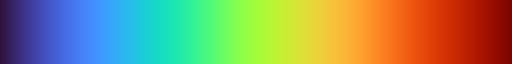

In [3]:
mpl.colormaps["turbo"]

In [6]:
def plot_losses(loss_file, logscale=True):
    epoch, step, loss = np.loadtxt(loss_file, delimiter=";", unpack=True)

    cmap = mpl.colormaps["turbo"]
    unique_epoch = np.unique(epoch)
    colors = [cmap(i) for i in np.linspace(0, 1, len(unique_epoch))]

    fig, ax = plt.subplots(dpi=150)
    shift = 0
    for i, e in enumerate(unique_epoch):
        cond = epoch == e
        ax.plot(step[cond] + shift, loss[cond], color=colors[i])
        shift += len(step[cond])
    
    if logscale:
        ax.set_yscale('log')
    ax.set_xlabel("Total training step")
    ax.set_ylabel("Training Loss")
    ax.grid(alpha=0.5)
    ax.set_title(os.path.basename(loss_file))
    return fig, ax

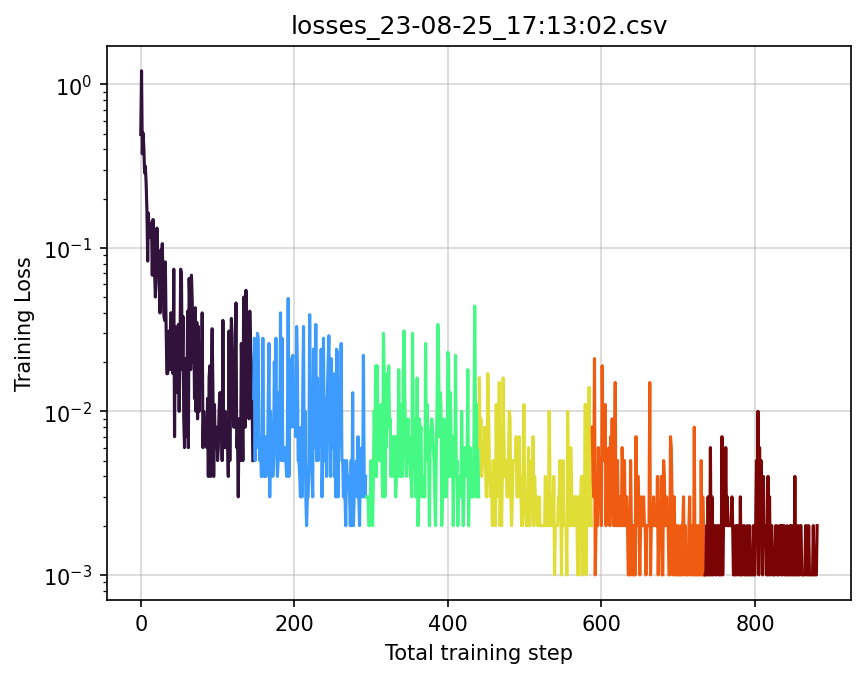

In [8]:
%matplotlib inline
results_folder = '/work/bbd0953/DDPM/results'
loss_file = sorted(glob.glob(f"{results_folder}/*csv"))[-1]  # Grab latest
fig, ax = plot_losses(loss_file, logscale=True)
fig.show()
